In [1]:
%pylab inline
import numpy as np
import os
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
latest = True
dissfull = True   # If full dissimilarity matrix has been included for clusiVAT partioning.
dataset = ''
metric = ''

if latest:
    f_iVAT = open('./Results/latest_VAT.csv','rb')
    D_iVAT = np.loadtxt(f_iVAT,delimiter=',')
    f_iVAT.close()

    f_VAT = open('Results/latest_iVAT.csv','rb')
    D_VAT = np.loadtxt(f_VAT,delimiter=',')
    f_VAT.close()
    
    try:
        f_disful = open('Results/latest_disful.csv','rb')
        disful = np.loadtxt(f_disful,delimiter=',')
        f_disful.close()
    except:
        print 'Full dissimilarity matrix not saved seperately.'
    
    f_ind = open('Results/latest_ind.pickle','rb')
    I_VAT = pickle.load(f_ind)
    f_ind.close()
    
    f_sind = open('Results/latest_sind.pickle','rb')
    sampleIndex = pickle.load(f_sind)
    f_ind.close()

    f_MSTC = open('Results/latest_MSTC.pickle','rb')
    C = pickle.load(f_MSTC)
    f_MSTC.close()
    
    f_MSTd = open('Results/latest_MSTd.pickle','rb')
    d = pickle.load(f_MSTd)
    f_MSTd.close()
    
    f_meta = open('Results/latest_meta.pickle','rb')
    meta = pickle.load(f_meta)
    f_meta.close()
else:
    f_iVAT = open('Results/'+dataset+'_'+metric+'_iVAT.csv','rb')
    D_iVAT = np.loadtxt(f_iVAT,delimiter=',')
    f_iVAT.close()

    f_VAT = open('Results/'+dataset+'_'+metric+'_VAT.csv','rb')
    D_VAT = np.loadtxt(f_VAT,delimiter=',')
    f_VAT.close()

    f_ind = open('Results/'+dataset+'_'+metric+'_ind.pickle','rb')
    I_VAT = pickle.load(f_ind)
    f_ind.close()
    
    f_sind = open('Results/'+dataset+'_'+metric+'_sind.pickle','rb')
    sampleIndex = pickle.load(f_sind)
    f_sind.close()

    f_MSTC = open('Results/'+dataset+'_'+metric+'_MSTC.pickle','rb')
    C = pickle.load(f_MSTC)
    f_MSTC.close()
    
    f_MSTd = open('Results/'+dataset+'_'+metric+'_MSTd.pickle','rb')
    d = pickle.load(f_MSTd)
    f_MSTd.close()
    
    f_meta = open('Results/'+dataset+'_meta.pickle','rb')
    meta = pickle.load(f_meta)
    f_meta.close()

In [40]:
setSelector = meta['set']
sampleRatio = meta['sample ratio']
metric = meta['metric']

# Data input - assumes this is done externally - not considered part of complexity.
datapath = 'UCR_TS_Archive_2015/'
datadirlist = os.listdir(datapath)
datadirlist.sort()
datadir = datapath+datadirlist[setSelector]+'/'
datafile = [i for i in os.listdir(datadir) if 'TEST' in i]
f = file(datadir+datafile[0])

# Array of time series data. This is a poor way of doing it because it means the series must be 
# strorable in memory before being converted to a RDD.
ts = np.genfromtxt(f, delimiter = ',')
numSeries = len(ts)
numSamples = len(sampleIndex)
lenSeries = len(ts[0])
classes = np.unique(ts[:,0])
#classes = np.append(classes,classes[-1]+1)
sampleClasses = np.unique(ts[sampleIndex,0])
#sampleClasses = np.append(sampleClasses,sampleClasses[-1]+1)

if sampleRatio != 1.0:
    if len(classes) == len(sampleClasses):
        print 'All classes represented in sampled data.'
    else:
        print 'All classes ARE NOT represented in sampled data.'

All classes represented in sampled data.


## iVAT image and manually selected cluster boundaries

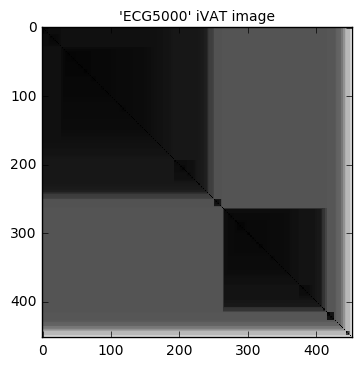

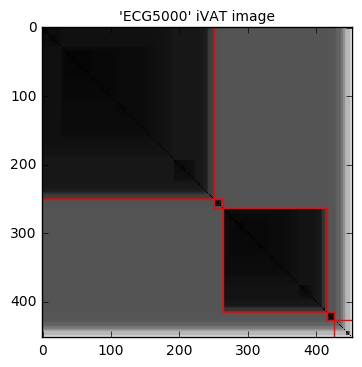

In [54]:
figure(figsize=(4,4))
#plt.imshow(D_iVAT[400:,400:],cmap='Greys_r',interpolation='none');
plt.imshow(D_iVAT,cmap='Greys_r',interpolation='none');
#plt.plot([13],[13],'ro')
plt.title('\''+datadirlist[setSelector]+'\' iVAT image',fontsize='medium')

plt.savefig('./images/iVAT_'
            +str(datadirlist[setSelector])+str(metric)+str(sampleRatio)+'.pdf'
            ,type='pdf',bbox_inches='tight')

figure(figsize=(4,4))
plt.imshow(D_iVAT,cmap='Greys_r',interpolation='none');
plt.title('\''+datadirlist[setSelector]+'\' iVAT image',fontsize='medium')
s = 0

# Array of iVAT indices separating clusters.
showClusters = True
#indices = [250,262,415,427,443,449]
truclus = [  1,  1,  1,  1]
indices = [250,263,415,426]
indices = [i+1 for i in indices]
indices.sort()
numClusters = len(indices)+1

if showClusters:
    for i in range(numClusters-2):
        plt.plot((indices[i]-0.5, indices[i]-0.5), (s-0.5,indices[i+1]-0.5), 'r-')
        plt.plot((s-0.5,indices[i+1]-0.5),(indices[i]-0.5, indices[i]-0.5), 'r-')
        s = indices[i]
    plt.plot((indices[-1]-0.5, indices[-1]-0.5), (s-0.5,len(D_iVAT)-0.5), 'r-')
    plt.plot((s-0.5, len(D_iVAT)-0.5), (indices[-1]-0.5, indices[-1]-0.5), 'r-')
    plt.axis([-0.5,len(D_iVAT)-0.5,len(D_iVAT)-0.5,-0.5]);

plt.savefig('./images/iVATwClust_'
            +str(datadirlist[setSelector])+str(metric)+str(sampleRatio)+'.pdf'
            ,type='pdf',bbox_inches='tight')

There are 4500 series and 141 samples per series in the 'ECG5000' dataset


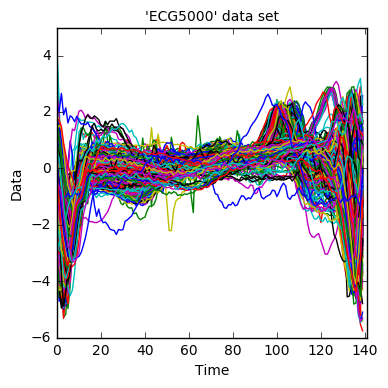

In [5]:
print('There are '+str(numSeries)+' series and '+str(lenSeries)+
      ' samples per series in the \''+datadirlist[setSelector]+'\' dataset')

maxval = np.ceil(np.max(ts[sampleIndex,1:]))
minval = np.floor(np.min(ts[sampleIndex,1:]))
textpos = minval + 0.85*(maxval -minval)
#textpos = minval + 0.85*(6 - minval)  #When changing axis limits manually
tsaxlim = [0,lenSeries,minval,maxval]      # Axis limits for time series plot.
#tsaxlim = [0,lenSeries,minval,6]      # Axis limits for time series plot.

figure(figsize=(4,4));
plt.plot(ts[sampleIndex,1:].T);
plt.xlabel('Time',fontsize='medium')
plt.ylabel('Data',fontsize='medium')
plt.axis(tsaxlim);
plt.title('\''+datadirlist[setSelector]+'\' data set',fontsize='medium')

## iVAT image and manual partitioning

ECG5000NCC0.1
Cluster 1 diameter = 0.650757137001
Cluster 1 previous separation = (0.0, 0.11841300086671258)
Cluster 2 diameter = 0.446227446635
Cluster 2 previous separation = (0.11841300086671258, 0.12299736577926534)
Cluster 3 diameter = 0.512021452578
Cluster 3 previous separation = (0.12299736577926534, 0.12691928403437003)
Cluster 4 diameter = 0.248462011309
Cluster 4 previous separation = (0.12691928403437003, 0.12723761391616106)
Cluster 5 diameter = 0.822706395224
Cluster 5 previous separation = (0.12723761391616106, 0.47263904789612754)


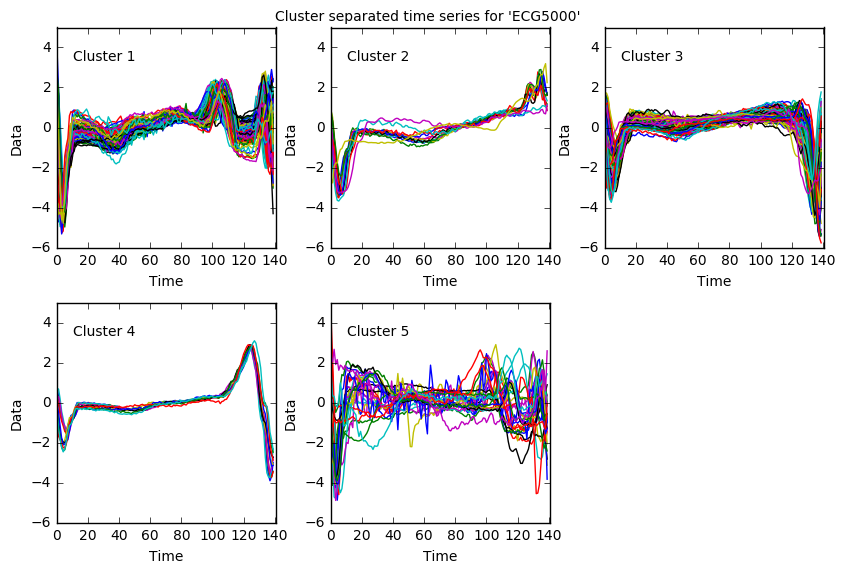

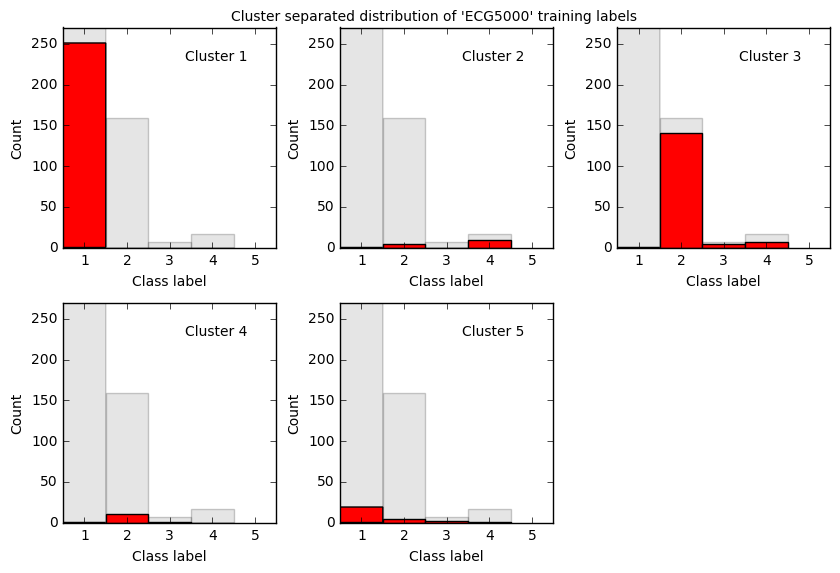

In [55]:
# Plotting configuration options
figcol = 3                        # Number of columns.
figrow = 1 + numClusters / figcol
figsize = (3.3*figcol,3*figrow)

maxbin = np.max(np.histogram(ts[sampleIndex,0],bins=classes)[0])
histlim = [min(classes),max(classes)+1,0,maxbin]   # Axis limits for class histograms.

fig = figure(figsize=figsize)
lastClust = 0
plt.suptitle('Cluster separated time series for \''+datadirlist[setSelector]+'\'',fontsize='medium')
print(str(datadirlist[setSelector])+str(metric)+str(sampleRatio))

for i in range(numClusters-1):
    ax = subplot(numClusters/figcol+1,figcol,i+1)
    plt.plot(ts[sampleIndex[I_VAT[lastClust:indices[i]]],1:].T)
    if dissfull:
        clusdis = disful[sampleIndex[I_VAT[lastClust:indices[i]]],:]
        clusdis = clusdis[:,sampleIndex[I_VAT[lastClust:indices[i]]]]
        diam = np.max(clusdis)
    ax.text(lenSeries/14,textpos,'Cluster '+str(i+1),fontsize='medium')
    plt.xlabel('Time',fontsize='medium')
    plt.ylabel('Data',fontsize='medium')
    plt.axis(tsaxlim);
    if dissfull:
        print('Cluster '+str(i+1)+' diameter = '+str(diam))
        print('Cluster '+str(i+1)+' previous separation = '+str((d[lastClust],d[indices[i]])))
    lastClust = indices[i]
ax = subplot(numClusters/figcol+1,figcol,i+2)
plt.plot(ts[sampleIndex[I_VAT[lastClust:]],1:].T)
if dissfull:
    clusdis = disful[sampleIndex[I_VAT[lastClust:]],:]
    clusdis = clusdis[:,sampleIndex[I_VAT[lastClust:]]]
    diam = np.max(clusdis)
ax.text(lenSeries/14,textpos,'Cluster '+str(i+2))
plt.xlabel('Time',fontsize='medium')
plt.ylabel('Data',fontsize='medium')
plt.axis(tsaxlim,fontsize='medium');
if dissfull:
    print('Cluster '+str(i+2)+' diameter = '+str(diam))
    print('Cluster '+str(i+2)+' previous separation = '+str((d[lastClust],d[-1])))
fig.subplots_adjust(hspace=0.25,wspace = 0.25,top=0.95)

fig.savefig('./images/tsClust_'
            +str(datadirlist[setSelector])+str(metric)+str(sampleRatio)+'.pdf'
            ,type='pdf',bbox_inches='tight')

fig = figure(figsize=figsize)
plt.suptitle('Cluster separated distribution of \''+datadirlist[setSelector]+'\' training labels',fontsize='medium')
lastClust = 0

for i in range(numClusters-1):
    ax = subplot(numClusters/figcol+1,figcol,i+1)
    plt.hist(ts[sampleIndex,0],bins=classes,alpha=0.2,color='grey')
    plt.hist(ts[sampleIndex[I_VAT[lastClust:indices[i]]],0],bins=classes,color='red')
    lastClust = indices[i]
    #ax.text(max(classes)/14.0+1,maxbin*0.85,'Cluster '+str(i+1),fontsize='medium')   # Top left
    ax.text(8*max(classes)/14.0+1,maxbin*0.85,'Cluster '+str(i+1),fontsize='medium') # Top right
    plt.xlabel('Class label',fontsize='medium')
    plt.ylabel('Count',fontsize='medium')
    plt.axis(histlim,fontsize='medium');
    plt.xticks(classes + 0.5, classes.astype(int),fontsize='medium')
ax = subplot(numClusters/figcol+1,figcol,i+2)
plt.hist(ts[sampleIndex,0],bins=classes,alpha=0.2,color='grey')
plt.hist(ts[sampleIndex[I_VAT[lastClust:]],0],bins=classes,color='red')
plt.xlabel('Class label',fontsize='medium')
plt.ylabel('Count',fontsize='medium')
#ax.text(max(classes)/14.0+1,maxbin*0.85,'Cluster '+str(i+2),fontsize='medium')   # Top left
ax.text(8*max(classes)/14.0+1,maxbin*0.85,'Cluster '+str(i+2),fontsize='medium') # Top right
plt.axis(histlim,fontsize='medium');
plt.xticks(classes + 0.5, classes.astype(int),fontsize='medium')
fig.subplots_adjust(hspace=0.25,wspace=0.3,top=0.95)

fig.savefig('./images/tsClustHist_'
            +str(datadirlist[setSelector])+str(metric)+str(sampleRatio)+'.pdf'
            ,type='pdf',bbox_inches='tight')

## iVAT image and automatic partitioning

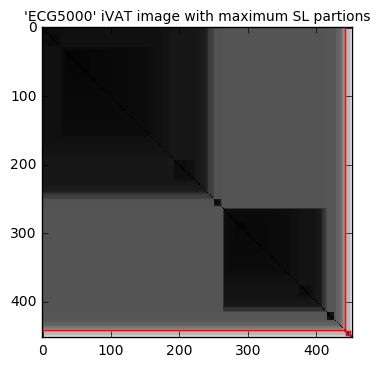

In [7]:
figure(figsize=(4,4))
plt.imshow(D_iVAT,cmap='Greys_r',interpolation='none');
plt.title('\''+datadirlist[setSelector]+'\' iVAT image with maximum SL partions',fontsize='medium')

# Number of clusters identified for partitioning.
numClustersP = 6
partindices = np.argsort(d)[-numClustersP:]
partindices.sort()
s = 0

if numClusters != 0:
    for i in range(numClustersP-2):
        plt.plot((partindices[i]-0.5, partindices[i]-0.5), (s-0.5,partindices[i+1]-0.5), 'r-')
        plt.plot((s-0.5,partindices[i+1]-0.5),(partindices[i]-0.5, partindices[i]-0.5), 'r-')
        s = partindices[i]
    plt.plot((partindices[-1]-0.5, partindices[-1]-0.5), (s-0.5, len(D_iVAT)-0.5), 'r-')
    plt.plot((s-0.5, len(D_iVAT)-0.5), (partindices[-1]-0.5, partindices[-1]-0.5), 'r-')
    plt.axis([-0.5,len(D_iVAT)-0.5,len(D_iVAT)-0.5,-0.5],fontsize='medium');

plt.savefig('./images/clusiVAT_'
            +str(datadirlist[setSelector])+str(metric)+str(sampleRatio)+'.pdf'
            ,type='pdf',bbox_inches='tight')

## Classifying remaining unsampled points using sampled labels

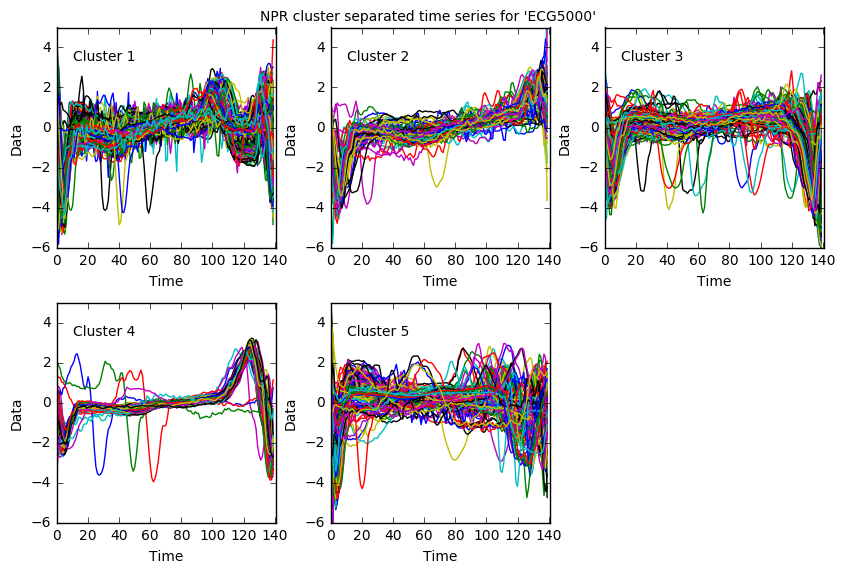

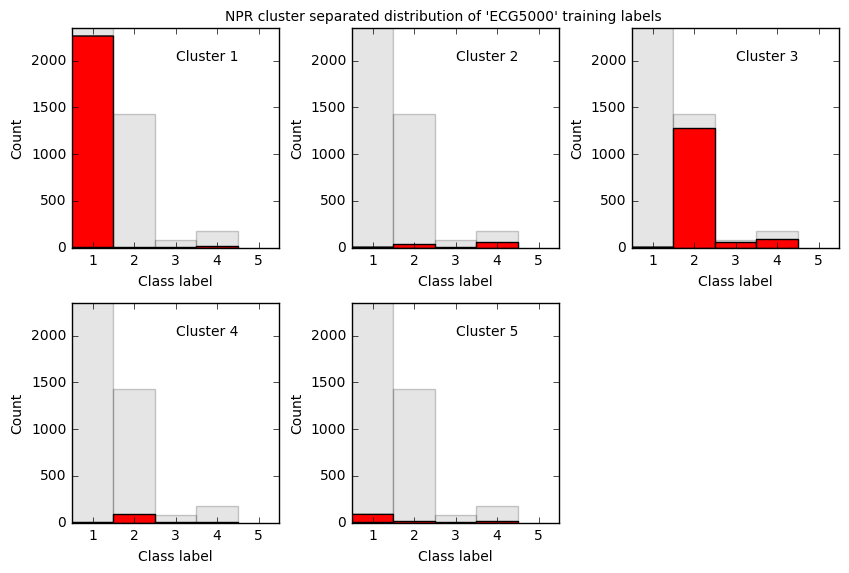

In [56]:
# This determinethe remaining indices from the original data index
# which are not in the smapleIndex.
remainIndex = np.array([i for i in range(len(disful)) if i not in sampleIndex])
# The rows of the full dissimilarity matrix corresponding to the 
# remaining indices are filtered out as we only need to find out
# which column has the smallest distance to each row i.e. unsampled
# point. Similarly, we can filter all the columns that belong to the
# points in the sampled index so it takes less time to search.
clustDissim = disful[remainIndex,:]
clustDissim = clustDissim[:,sampleIndex]

maxbin = np.max(np.histogram(ts[remainIndex,0],bins=classes)[0])
histlim = [min(classes),max(classes)+1,0,maxbin]   # Axis limits for class histograms.

# This iterates through each row, finds the column index in the 
# filtered array that corresponds to the minimum, then uses that
# index to find the I_VAT reordering index belonging to that 
# point. i.e. recover the ordering in the sampled iVAT image,
# belonging to the nearest smapled point of the current out-of-
# sample point. This position in iVAT allows the corresponding 
# cluster of the unsampled point to be assessed.
nearNeighVAT =  np.array([np.where(I_VAT == np.argmin(i))[0][0] for i in clustDissim])

fig = figure(figsize=figsize)
plt.suptitle('NPR cluster separated time series for \''+datadirlist[setSelector]+'\'',fontsize='medium')
lastClust = 0

for i in range(numClusters-1):
    clustMask = remainIndex[[j for j in range(len(nearNeighVAT)) if nearNeighVAT[j] in range(lastClust,indices[i])]]
    ax = subplot(numClusters/figcol+1,figcol,i+1)
    if len(clustMask) > 0:
        plt.plot(ts[clustMask,1:].T)
    else:
        plt.plot([1])
    lastClust = indices[i]
    ax.text(lenSeries/14,textpos,'Cluster '+str(i+1),fontsize='medium')
    plt.xlabel('Time',fontsize='medium')
    plt.ylabel('Data',fontsize='medium')
    plt.axis(tsaxlim);
clustMask = remainIndex[[j for j in range(len(nearNeighVAT)) if nearNeighVAT[j] in range(lastClust,len(D_iVAT))]]
ax = subplot(numClusters/figcol+1,figcol,i+2)
if len(clustMask) > 0:
    plt.plot(ts[clustMask,1:].T)
ax.text(lenSeries/14,textpos,'Cluster '+str(i+2))
plt.xlabel('Time',fontsize='medium')
plt.ylabel('Data',fontsize='medium')
plt.axis(tsaxlim,fontsize='medium');
fig.subplots_adjust(hspace=0.25,wspace = 0.25,top=0.95)

fig.savefig('./images/tsClusiInfer_'
            +str(datadirlist[setSelector])+str(metric)+str(sampleRatio)+'.pdf'
            ,type='pdf',bbox_inches='tight')

fig = figure(figsize=figsize)
plt.suptitle('NPR cluster separated distribution of \''+datadirlist[setSelector]+'\' training labels',fontsize='medium')
lastClust = 0

for i in range(numClusters-1):
    clustMask = remainIndex[[j for j in range(len(nearNeighVAT)) if nearNeighVAT[j] in range(lastClust,indices[i])]]
    ax = subplot(numClusters/figcol+1,figcol,i+1)
    plt.hist(ts[remainIndex,0],bins=classes,alpha=0.2,color='grey')
    plt.hist(ts[clustMask,0],bins=classes,color='red')
    lastClust = indices[i]
    #ax.text(max(classes)/14.0+1,maxbin*0.85,'Cluster '+str(i+1),fontsize='medium')   # Top left
    ax.text(7*max(classes)/14.0+1,maxbin*0.85,'Cluster '+str(i+1),fontsize='medium') # Top right
    plt.xlabel('Class label',fontsize='medium')
    plt.ylabel('Count',fontsize='medium')
    plt.xticks(classes + 0.5, classes.astype(int),fontsize='medium')
    plt.axis(histlim,fontsize='medium');
clustMask = remainIndex[[j for j in range(len(nearNeighVAT)) if nearNeighVAT[j] in range(lastClust,len(D_iVAT))]]
ax = subplot(numClusters/figcol+1,figcol,i+2)
plt.hist(ts[remainIndex,0],bins=classes,alpha=0.2,color='grey')
plt.hist(ts[clustMask,0],bins=classes,color='red')
#ax.text(7*max(classes)/14.0+1,maxbin*0.85,'Cluster '+str(i+2),fontsize='medium')    # Top left
ax.text(7*max(classes)/14.0+1,maxbin*0.85,'Cluster '+str(i+2),fontsize='medium')  # Top right
plt.xlabel('Class label',fontsize='medium')
plt.ylabel('Count',fontsize='medium')
plt.xticks(classes + 0.5, classes.astype(int),fontsize='medium')
plt.axis(histlim,fontsize='medium');
fig.subplots_adjust(hspace=0.25,wspace=0.35,top=0.95)

fig.savefig('./images/tsClusiHistInfer_'
            +str(datadirlist[setSelector])+str(metric)+str(sampleRatio)+'.pdf'
            ,type='pdf',bbox_inches='tight')